## Evolution de la surface moyenne brûlée au fil des ans ##

*Variable ratio surface totale/ nombre de feu, calculée chaque année*

In [1]:
import pandas as pd

database = 'combine.csv'
data_frame = pd.read_csv(database, sep = ';')

# Affichez les premières lignes pour vérifier si tout fonctionne correctement
#data_frame.head()


Trois fois plus d’hectares brulés par feu de forêt en moyenne en 17 ans 
La surface moyenne concernée par chaque feu est passée de 2 hectares entre 2006 et 2010 à 6 
hectares entre 2018 et 2022, année exceptionnelle pendant laquelle le ratio surface / feu de forêt a 
atteint 13,56 hectares par feu. 
Au global sur la période, la moyenne de 4,64 hectares par feu de forêt cache de forte disparité par 
région. Si la façade méditerranéenne et la Corse sont les zones les plus concernées en nombre, la 
façade ouest et le quart nord-est de la France souffrent d’une surface incendiée plus vaste. 

In [2]:
import pandas as pd

# Convertissez la colonne 'Surface' en type numérique
data_frame['Surface parcourue (m2)'] = pd.to_numeric(data_frame['Surface parcourue (m2)'], errors='coerce')

# Créez une nouvelle colonne 'Surface/Feu' en divisant la surface par le nombre de feux pour chaque année
# et en convertissant le résultat en hectares
data_frame['Surface/Feu'] = data_frame.groupby('Année')['Surface parcourue (m2)'].transform(lambda x: (x.sum() / len(x)) / 10000)

data_frame.head()

,Année,Numéro,Département,Code INSEE,Nom de la commune,Date de première alerte,Origine de l'alerte,Moyens de première intervention,Surface parcourue (m2),Surface forêt (m2),...,Nombre de décès,Nombre de bâtiments totalement détruits,Nombre de bâtiments partiellement détruits,Hygrométrie (%),Vitesse moyenne du vent (Km/h),Direction du vent,Température (°C),Précision de la donnée,Présence d'un contour valide,Surface/Feu
0,2006,2,01,01148,Dortan,27/02/2006 13:56,Indéterminé,NaN,10000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Données partielles ou non valides,"Non,",2.191584
1,2006,3,01,01321,Revonnas,15/03/2006 16:02,Indéterminé,NaN,10000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Données partielles ou non valides,"Non,",2.191584
2,2006,4,01,01032,Béligneux,16/03/2006 17:03,Indéterminé,NaN,10000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Données partielles ou non valides,"Non,",2.191584
3,2006,5,01,01109,Collonges,27/03/2006 14:30,Indéterminé,NaN,10000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Données partielles ou non valides,"Non,",2.191584
4,2006,6,01,01384,Saint-Rambert-en-Bugey,24/04/2006 16:43,Indéterminé,NaN,20000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Données partielles ou non valides,"Non,",2.191584


In [46]:
# Calculez la moyenne de la surface des feux de 2006 à 2022
moyenne_surface_2006_2022 = data_frame['Surface parcourue (m2)'].mean() / 10000
print(moyenne_surface_2006_2022)

# Calculez la moyenne de la surface des feux de 2006 à 2021
moyenne_surface_2006_2021 = data_frame[data_frame['Année'] <= 2021]['Surface parcourue (m2)'].mean() / 10000
print(moyenne_surface_2006_2021)

4.678834963701376
3.757675874209619


## Graphique d'évolution de la surface brûlée au cours des années 

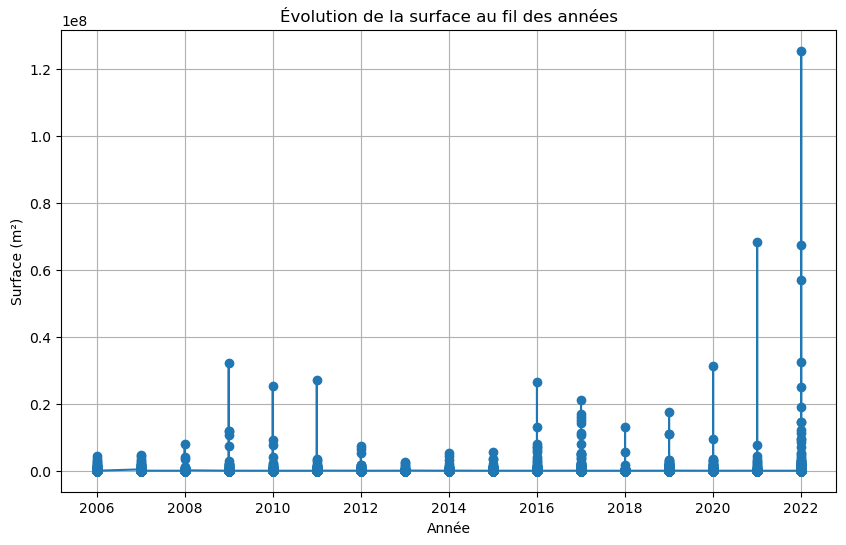

In [5]:
import matplotlib.pyplot as plt

# Créez le graphique
plt.figure(figsize=(10, 6))  # Réglez la taille du graphique selon vos préférences
plt.plot(data_frame['Année'], data_frame['Surface parcourue (m2)'], marker='o', linestyle='-')

# Ajoutez des étiquettes et un titre
plt.xlabel('Année')
plt.ylabel('Surface (m²)')
plt.title('Évolution de la surface au fil des années')

# Affichez le graphique
plt.grid(True)
plt.show()


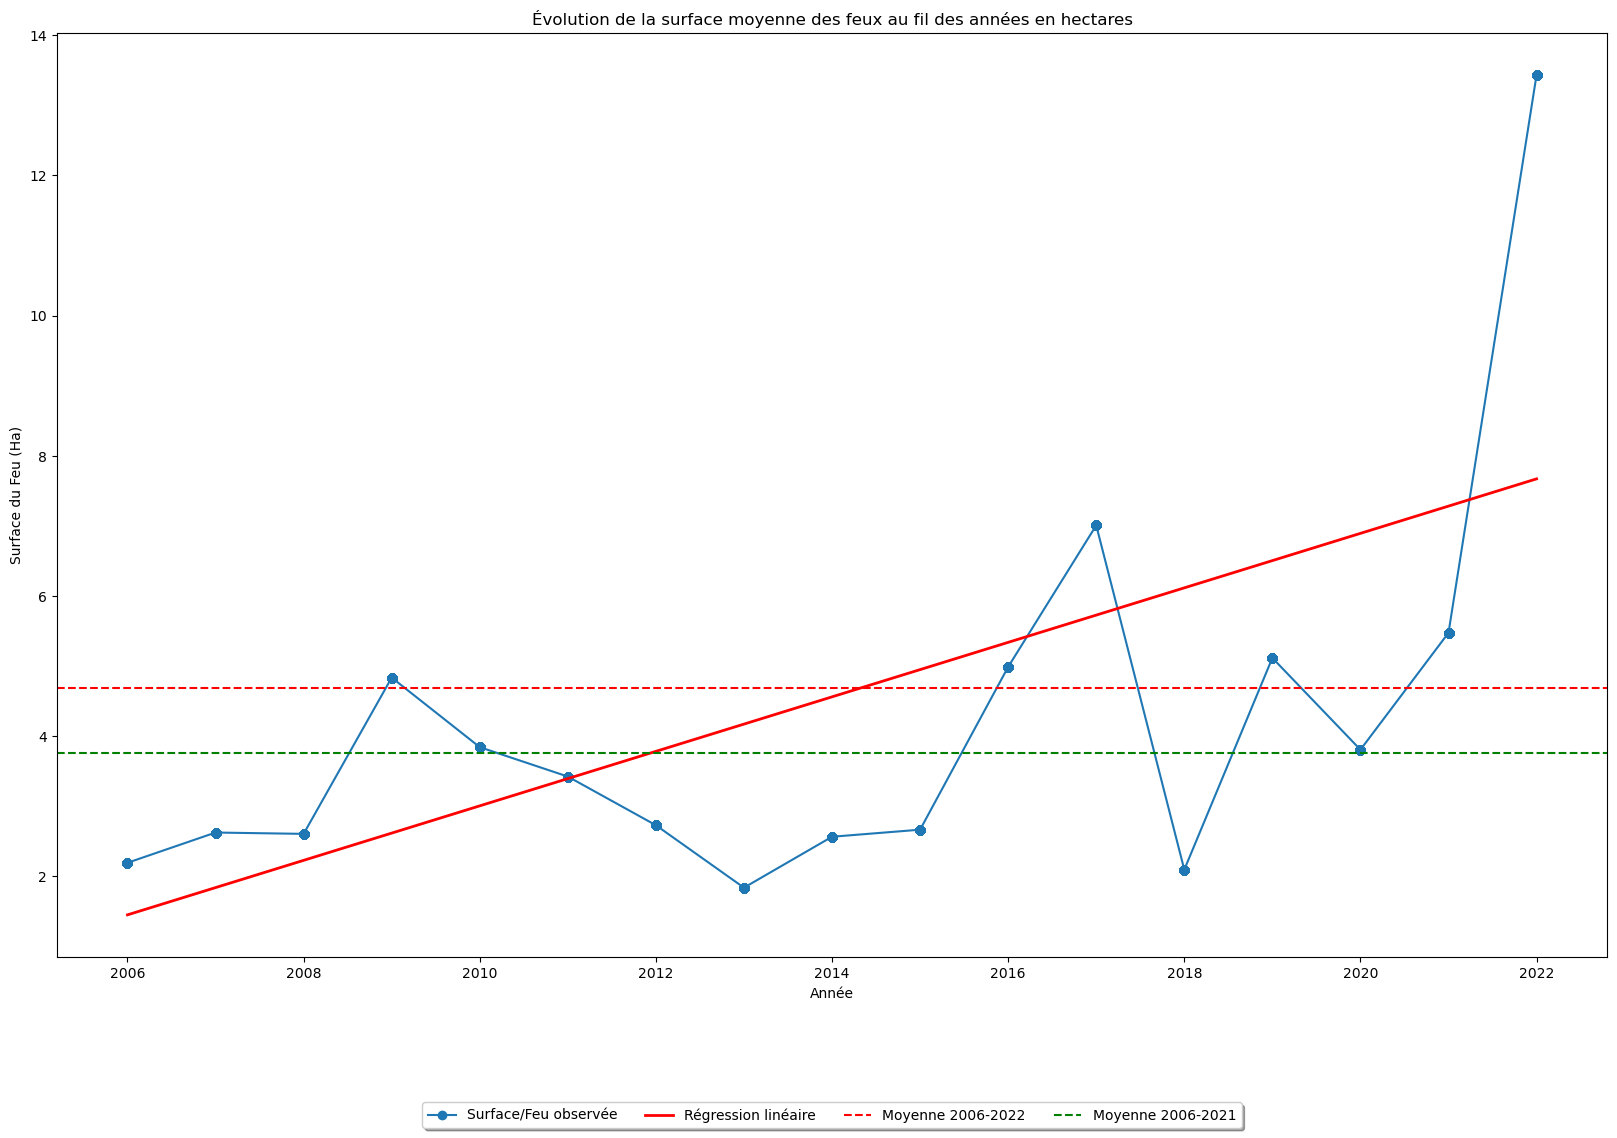

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Créez un modèle de régression linéaire
regression_model = LinearRegression()

# Sélectionnez les données d'entraînement (années et 'Surface/Feu')
X = data_frame['Année'].values.reshape(-1, 1)
y = data_frame['Surface/Feu'].values.reshape(-1, 1)

# Entraînez le modèle
regression_model.fit(X, y)

# Obtenez les prédictions du modèle
y_pred = regression_model.predict(X)

# Créez le graphique
plt.figure(figsize=(20, 12))  # Réglez la taille du graphique selon vos préférences

# Tracer les données observées
plt.plot(data_frame['Année'], data_frame['Surface/Feu'], marker='o', linestyle='-', label='Surface/Feu observée')

# Tracer la droite de régression
plt.plot(data_frame['Année'], y_pred, label='Régression linéaire', color='red', linewidth=2)

# Tracer la moyenne des surfaces de 2006 à 2022
plt.axhline(y=moyenne_surface_2006_2022, color='r', linestyle='--', label='Moyenne 2006-2022')

# Tracer la moyenne des surfaces de 2006 à 2021
plt.axhline(y=moyenne_surface_2006_2021, color='g', linestyle='--', label='Moyenne 2006-2021')

# Ajouter des étiquettes et un titre
plt.xlabel('Année')
plt.ylabel('Surface du Feu (Ha)')
plt.title('Évolution de la surface moyenne des feux au fil des années en hectares')

# Afficher la légende en bas
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)

# Supprimer les grilles en fond
plt.grid(False)

# Affichez le graphique
plt.show()


## Evolution de la surface brûlée au fil des ans ##

*Chaque année, on calcule la surface qui a brûlée au total sur le territoire*

In [7]:
import pandas as pd

database = 'combine.csv'
df_surface = pd.read_csv(database, sep = ';')

df_surface['Surface parcourue (m2)'] = pd.to_numeric(df_surface['Surface parcourue (m2)'], errors='coerce')

df_surface['Surface_totale_an'] = df_surface.groupby('Année')['Surface parcourue (m2)'].transform('sum')

# Convertissez le résultat en hectares
df_surface['Surface_totale_an'] /= 10000

df_surface.head()


,Année,Numéro,Département,Code INSEE,Nom de la commune,Date de première alerte,Origine de l'alerte,Moyens de première intervention,Surface parcourue (m2),Surface forêt (m2),...,Nombre de décès,Nombre de bâtiments totalement détruits,Nombre de bâtiments partiellement détruits,Hygrométrie (%),Vitesse moyenne du vent (Km/h),Direction du vent,Température (°C),Précision de la donnée,Présence d'un contour valide,Surface_totale_an
0,2006,2,01,01148,Dortan,27/02/2006 13:56,Indéterminé,NaN,10000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Données partielles ou non valides,"Non,",7096.3499
1,2006,3,01,01321,Revonnas,15/03/2006 16:02,Indéterminé,NaN,10000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Données partielles ou non valides,"Non,",7096.3499
2,2006,4,01,01032,Béligneux,16/03/2006 17:03,Indéterminé,NaN,10000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Données partielles ou non valides,"Non,",7096.3499
3,2006,5,01,01109,Collonges,27/03/2006 14:30,Indéterminé,NaN,10000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Données partielles ou non valides,"Non,",7096.3499
4,2006,6,01,01384,Saint-Rambert-en-Bugey,24/04/2006 16:43,Indéterminé,NaN,20000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Données partielles ou non valides,"Non,",7096.3499


In [12]:
# Calculez la moyenne de la surface brûlée de 2006 à 2022
total_surface_2006_2022 = df_surface['Surface_totale_an'].mean()
print(total_surface_2006_2022)

# Calculez la moyenne de la surface des feux de 2006 à 2021
total_surface_2006_2021 = df_surface[df_surface['Année'] <= 2021]['Surface_totale_an'].mean() 
print(total_surface_2006_2021)

15118.908159425719
10500.382012617358


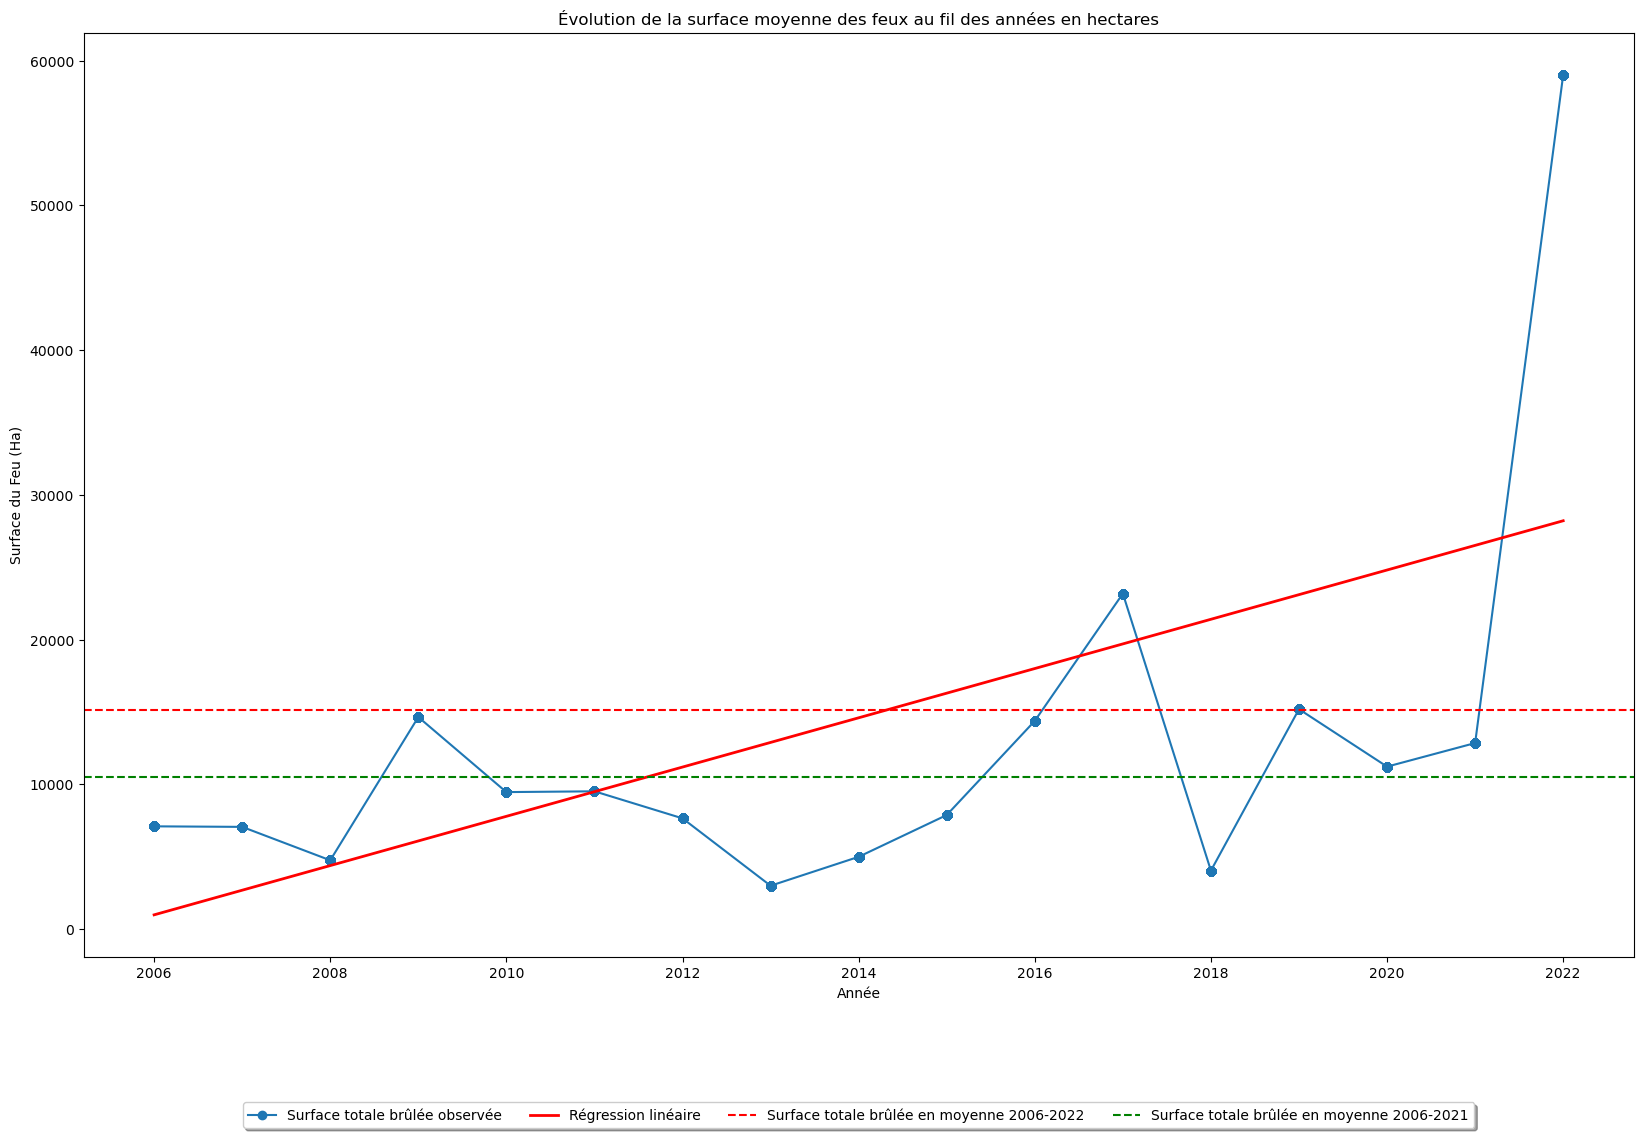

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Créez un modèle de régression linéaire
regression_model = LinearRegression()

# Sélectionnez les données d'entraînement (années et 'Surface_totale')
X = df_surface['Année'].values.reshape(-1, 1)
y = df_surface['Surface_totale_an'].values.reshape(-1, 1)

# Entraînez le modèle
regression_model.fit(X, y)

# Obtenez les prédictions du modèle
y_pred = regression_model.predict(X)

# Créez le graphique
plt.figure(figsize=(20, 12))  # Réglez la taille du graphique selon vos préférences

# Tracer les données observées
plt.plot(df_surface['Année'], df_surface['Surface_totale_an'], marker='o', linestyle='-', label='Surface totale brûlée observée')

# Tracer la droite de régression
plt.plot(df_surface['Année'], y_pred, label='Régression linéaire', color='red', linewidth=2)

# Tracer la moyenne des surfaces de 2006 à 2022
plt.axhline(y=total_surface_2006_2022, color='r', linestyle='--', label='Surface totale brûlée en moyenne 2006-2022')

# Tracer la moyenne des surfaces de 2006 à 2021
plt.axhline(y=total_surface_2006_2021, color='g', linestyle='--', label='Surface totale brûlée en moyenne 2006-2021')

# Ajouter des étiquettes et un titre
plt.xlabel('Année')
plt.ylabel('Surface du Feu (Ha)')
plt.title('Évolution de la surface moyenne des feux au fil des années en hectares')

# Afficher la légende en bas
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)

# Supprimer les grilles en fond
plt.grid(False)

# Affichez le graphique
plt.show()